<a href="https://colab.research.google.com/github/juliasalto/proyectodatalab/blob/main/EDA_test_hipotesis_datalab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA


En esta etapa del proyecto se desarrolla todo el análisis exploratorio de las variables numéricas del conjunto de datos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files
from google.colab import auth
from google.cloud import bigquery

In [ ]:
auth.authenticate_user()

project_id = 'saltoproyecto3'
client = bigquery.Client(project=project_id)

query = """
SELECT *
FROM `saltoproyecto4.datalab.inner_join`
"""

query_job = client.query(query)

df = query_job.to_dataframe()

df.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,about_product,rating,rating_count,category_main,category_secondary,category_terciary,rating_group,cat_discount_percentage,cat_rating_count
0,B09LQQYNZQ,Realme Smart TV Stick 4K,4699.0,4699.0,0,Type: HDMI|Power Requirement: DC 5 V|Number of...,4.5,224,Electronics,HomeAudio,MediaStreamingDevices|StreamingClients,3 - 4.5,bajo,bajo
1,B084872DQY,Mi 80 cm (32 inches) HD Ready Android Smart LE...,14999.0,14999.0,0,Resolution: HD Ready Android TV (1366x768) | R...,4.3,27508,Electronics,"HomeTheater,TV&Video",Televisions|SmartTelevisions,3 - 4.5,bajo,alto
2,B0B3CPQ5PF,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",28999.0,28999.0,0,Camera: 50MP Main Camera with Sony IMX766 and ...,4.3,17415,Electronics,Mobiles&Accessories,Smartphones&BasicMobiles|Smartphones,3 - 4.5,bajo,alto
3,B0B3CQBRB4,"OnePlus Nord 2T 5G (Gray Shadow, 8GB RAM, 128G...",28999.0,28999.0,0,Camera: 50MP Main Camera with Sony IMX766 and ...,4.3,17415,Electronics,Mobiles&Accessories,Smartphones&BasicMobiles|Smartphones,3 - 4.5,bajo,alto
4,B0B3D39RKV,"OnePlus Nord 2T 5G (Jade Fog, 12GB RAM, 256GB ...",33999.0,33999.0,0,Camera: 50MP Main Camera with Sony IMX766 and ...,4.3,17415,Electronics,Mobiles&Accessories,Smartphones&BasicMobiles|Smartphones,3 - 4.5,bajo,alto


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               1342 non-null   object 
 1   product_name             1342 non-null   object 
 2   discounted_price         1342 non-null   float64
 3   actual_price             1342 non-null   float64
 4   discount_percentage      1342 non-null   Int64  
 5   about_product            1342 non-null   object 
 6   rating                   1342 non-null   float64
 7   rating_count             1342 non-null   Int64  
 8   category_main            1342 non-null   object 
 9   category_secondary       1342 non-null   object 
 10  category_terciary        1334 non-null   object 
 11  rating_group             1342 non-null   object 
 12  cat_discount_percentage  1342 non-null   object 
 13  cat_rating_count         1342 non-null   object 
dtypes: Int64(2), float64(3),

In [ ]:
df["rating_count"] = df["rating_count"].astype(float)
df["discount_percentage"] = df["discount_percentage"].astype(float)



In [ ]:
fig = px.box(df, x= "category_main", y="discounted_price", points="all")
fig.show()

In [ ]:
fig = px.box(df, y="discounted_price", points="all")
fig.show()

In [ ]:
fig = px.box(df, x= "category_main", y="actual_price", points="all")
fig.show()

In [ ]:
fig = px.box(df, y="actual_price", points="all")
fig.show()

In [ ]:
fig = px.box(df, x= "category_main", y="discount_percentage", points="all")
fig.show()

In [ ]:
fig = px.box(df, y="discount_percentage", points="all")
fig.show()

In [ ]:
fig = px.box(df, x= "category_main", y="rating", points="all")
fig.show()

In [ ]:
fig = px.box(df, y="rating", points="all")
fig.show()

In [ ]:
fig = px.box(df, x= "category_main", y="rating_count", points="all")
fig.show()

In [ ]:
fig = px.box(df, y="rating_count", points="all")
fig.show()

In [ ]:
fig = px.box(df, x= "rating_group", y="discounted_price", points="all")
fig.show()

In [ ]:
fig = px.box(df, x= "rating_group", y="actual_price", points="all")
fig.show()

In [ ]:
fig = px.box(df, x= "rating_group", y="discount_percentage", points="all")
fig.show()
#medias parecidas

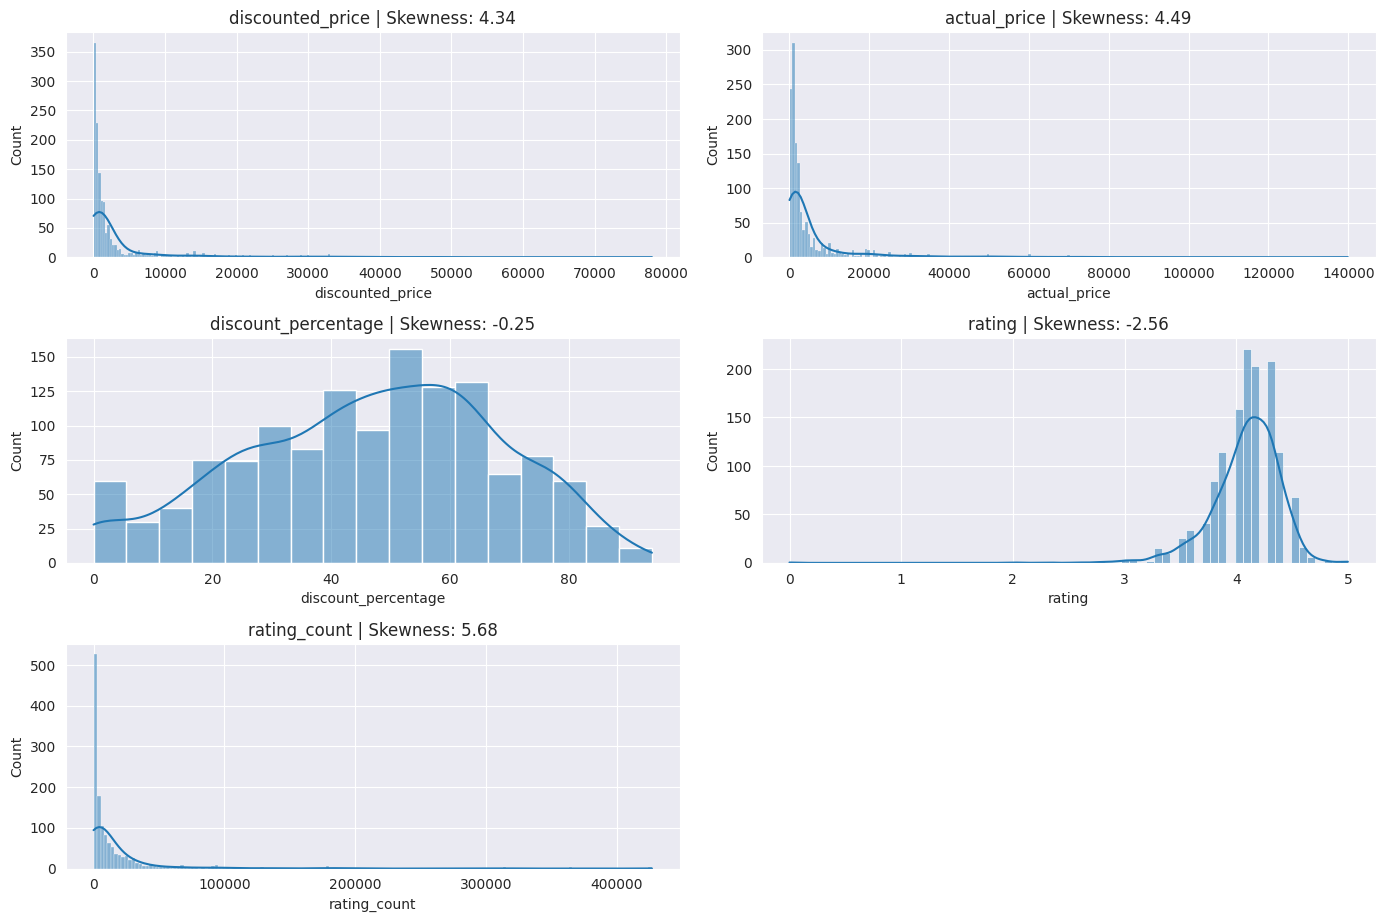

In [ ]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

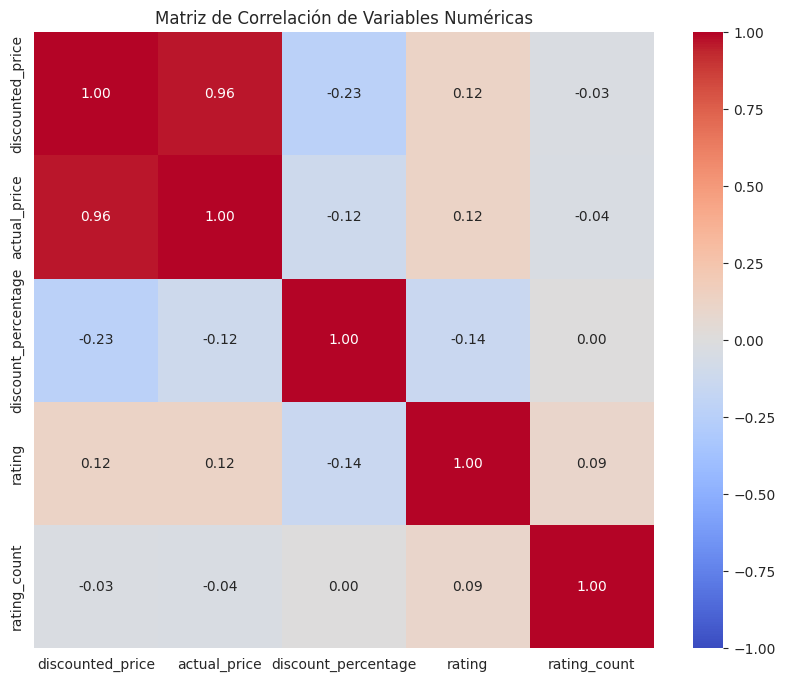

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [ ]:
fig = px.scatter(df, x="discounted_price", y="rating", trendline="ols")
fig.show()

In [ ]:
fig = px.scatter(df, x="actual_price", y="rating", trendline="ols")
fig.show()

In [ ]:
fig = px.scatter(df, x="rating_count", y="actual_price", trendline="ols")
fig.show()

# Test de hipótesis


En este hito del proyecto me planteo tres hipótesis que busco aceptar o rechazar. Las mismas son:


*   A mayor número de valoraciones de un producto, éste obtiene mejor calificación
*   A mayor porcentaje de descuento en su precio de venta, éste obtiene mejor calificación
* A mayor porcentaje de descuento en su precio



In [ ]:
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import  mannwhitneyu, shapiro


In [ ]:
# Almacenar rating y rating_count en listas por categoría
rating_alto_rating_count = df[df['cat_rating_count'] == 'alto']['rating'].tolist()
rating_bajo_rating_count = df[df['cat_rating_count'] == 'bajo']['rating'].tolist()
rating_alto_discount_percentage = df[df['cat_discount_percentage'] == 'alto']['rating'].tolist()
rating_bajo_discount_peercentage = df[df['cat_discount_percentage'] == 'bajo']['rating'].tolist()
rating_count_alto_discount_percentage = df[df['cat_discount_percentage'] == 'alto']['rating_count'].tolist()
rating_count_bajo_discount_percentage = df[df['cat_discount_percentage'] == 'bajo']['rating_count'].tolist()

alpha = 0.05


In [ ]:
# Test de Mann-Whitney U
# Más valoraciones mejor rating
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(rating_alto_rating_count, rating_bajo_rating_count, alternative='two-sided')
print("Test de Mann-Whitney U para rating_count vs rating")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()
# Interpretación de los resultados
print("\nInterpretación del Test de Mann-Whitney U:")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")


Test de Mann-Whitney U para rating_count vs rating
Estadística U: 269238.5
Valor p: 3.79766798756811e-10


Interpretación del Test de Wilcoxon (Mann-Whitney U):
Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'


In [ ]:
# Test de Mann-Whitney U
# Más porcentaje de descuento, mejor rating
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(rating_alto_discount_percentage, rating_bajo_discount_peercentage, alternative='two-sided')
print("Test de Mann-Whitney U para discount_percentage vs rating")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()

# Interpretación de los resultados
print("\nInterpretación del Test de Mann-Whitney U:")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")


Test de Mann-Whitney U para discount_percentage vs rating
Estadística U: 193801.5
Valor p: 9.318605508481562e-06


Interpretación del Test de Mann-Whitney U:
Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'


In [ ]:
# Test de Mann-Whitney U
# Más descuento, más valoraciones
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(rating_count_alto_discount_percentage, rating_count_bajo_discount_percentage, alternative='two-sided')
print("Test de Mann-Whitney U para discount_percentage vs rating_count")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()


# Interpretación de los resultados
print("\nInterpretación del Test de Mann-Whitney U:")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

Test de Mann-Whitney U para discount_percentage vs rating_count
Estadística U: 190148.5
Valor p: 8.931240354720477e-07


Interpretación del Test de Mann-Whitney U:
Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'


Rgresión lineal para discount_percentage y rating

In [ ]:
# Supongamos que tienes un DataFrame llamado df
X = df['discount_percentage']
y = df['rating']


In [ ]:
X = sm.add_constant(X)  # Esto agrega la constante (intercepto)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     27.24
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           2.08e-07
Time:                        15:24:41   Log-Likelihood:                -354.55
No. Observations:                1342   AIC:                             713.1
Df Residuals:                    1340   BIC:                             723.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1855    

In [ ]:
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
print(f'Error Cuadrático Medio (MSE): {mse}')


Error Cuadrático Medio (MSE): 0.09931218816304711


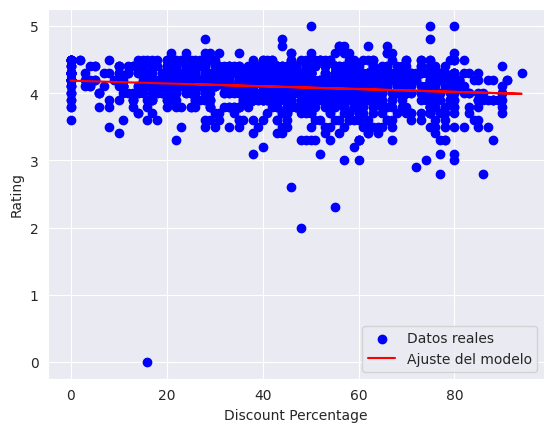

In [ ]:
plt.scatter(df['discount_percentage'], df['rating'], color='blue', label='Datos reales')
plt.plot(df['discount_percentage'], predictions, color='red', label='Ajuste del modelo')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.legend()
plt.show()


Regresión lineal múltiple para todas las variables que "afectan" al rating (discount_percentage, actual_price, discounted_price, raing_count)

In [ ]:

X = df[['discount_percentage', 'actual_price', 'discounted_price','rating_count']]
y = df['rating']


In [ ]:
X = sm.add_constant(X)  # Esto agrega la constante (intercepto)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     15.32
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           2.97e-12
Time:                        20:56:37   Log-Likelihood:                -337.99
No. Observations:                1342   AIC:                             686.0
Df Residuals:                    1337   BIC:                             712.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1646    

In [ ]:
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
print(f'Error Cuadrático Medio (MSE): {mse}')

Error Cuadrático Medio (MSE): 0.09689096343116167


In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal múltiple
reg = LinearRegression().fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = reg.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

# Imprimir los coeficientes y el sesgo - Valores de los pesos del modelo de regresión
print("Coeficientes:", reg.coef_)
print("Sesgo (Coeficiente W0:", reg.intercept_)
print("Coeficiente W1:", reg.coef_[0])
print("Coeficiente W2:", reg.coef_[1])

# Imprimir el coeficientes de determinación
print("Coeficiente de determinación:", reg.score(X_train, y_train))


Error cuadrático medio: 0.06923069399366424
Coeficientes: [ 0.00000000e+00 -2.57381074e-03  9.84266077e-06 -1.07145549e-05
  8.06380579e-07]
Sesgo (Coeficiente W0: 4.168717392136715
Coeficiente W1: 0.0
Coeficiente W2: -0.002573810744197097
Coeficiente de determinación: 0.04691492674618203
